In [3]:
from pandas import read_csv
from pandas import datetime
import pandas as pd
import missingno as msno
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

C:\Users\wjy39\AppData\Local\Temp\ipykernel_14932\3797728254.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
from numpy.random import randn
import os
import random
import numpy as np
import time

# load dataset
tr = pd.read_csv("train.csv").drop(['id'], axis=1)
te = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

In [5]:
tr.head()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
0,27.8816,1013.6,46.8,2.4,232.4,0.00,False,0.0,1.180
1,5.7540,1026.6,76.6,3.6,172.0,0.00,False,8.8,8.581
2,20.8220,1016.2,64.8,2.2,206.0,0.06,False,23.0,3.978
3,20.0758,1017.4,72.6,0.8,215.4,0.00,False,0.0,8.301
4,7.5260,1023.2,82.8,1.2,158.0,0.00,False,15.0,1.692


<AxesSubplot: >

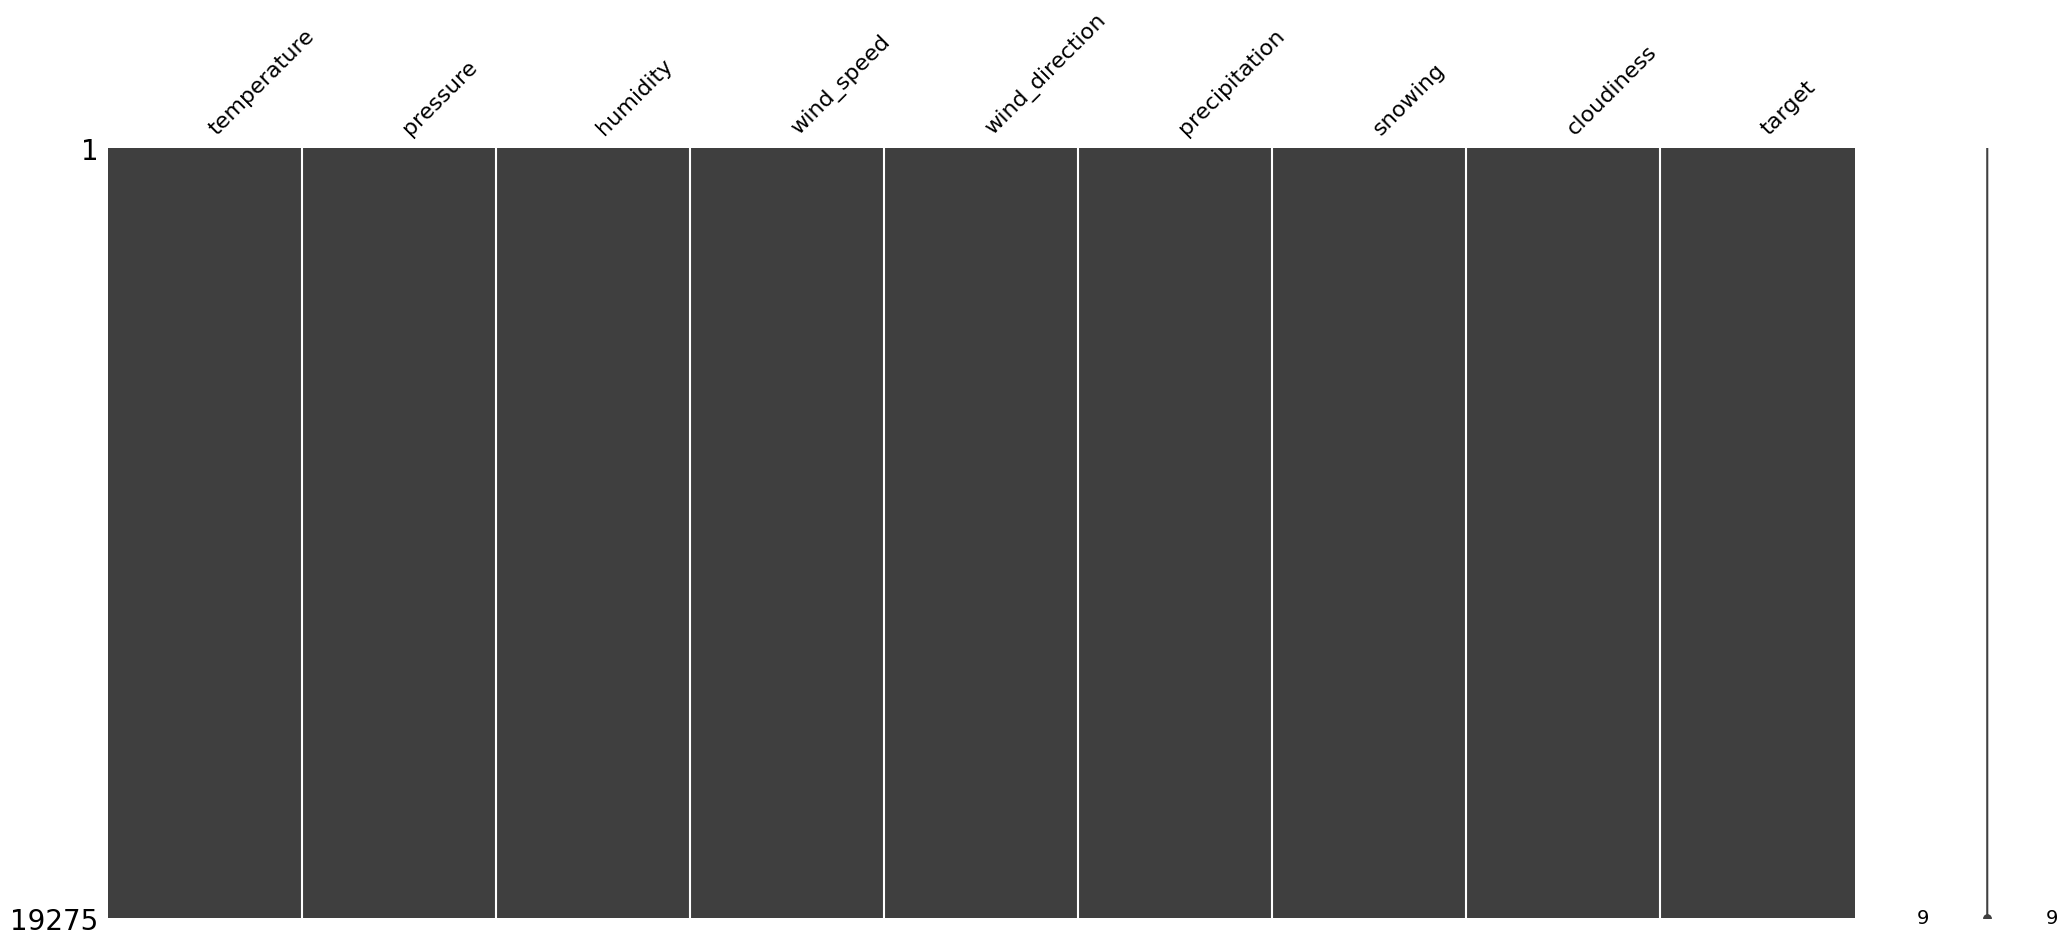

In [6]:
msno.matrix(tr)

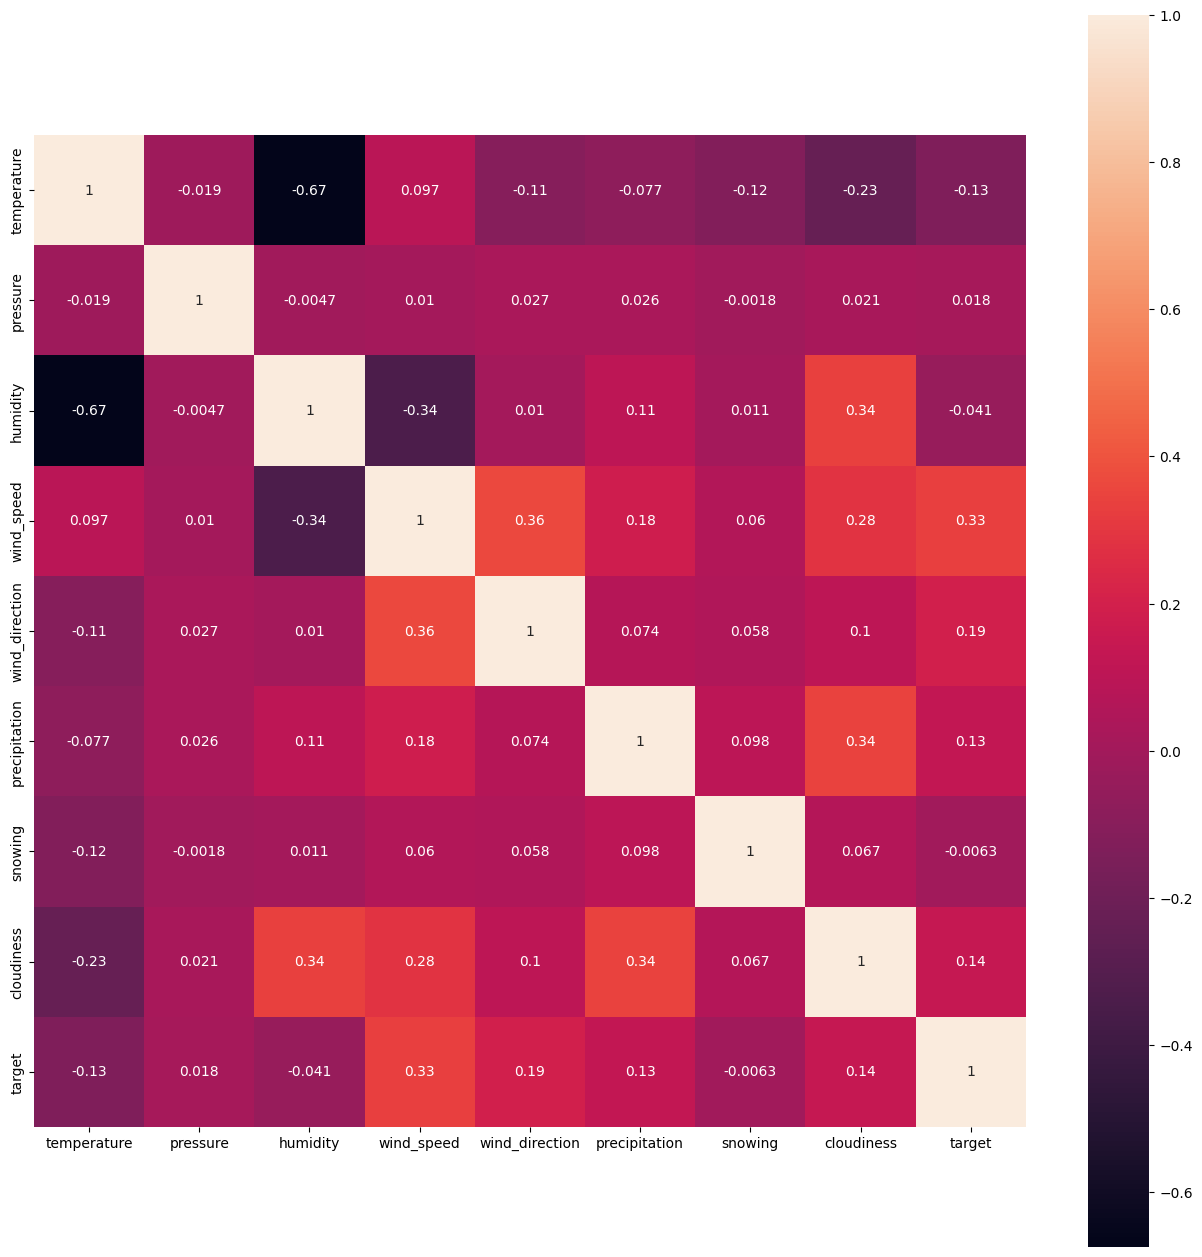

In [7]:
plt.subplots(figsize=(16, 16))
sns.heatmap(tr.corr(), annot=True, square=True)
plt.show()

In [8]:
#레이블 인코딩 수행
def format_features(df):
    #df['snowing'] = df['snowing'].str[:1]
    features = ['snowing']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [9]:
tr1 = format_features(tr)

In [10]:
tr1.head()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
0,27.8816,1013.6,46.8,2.4,232.4,0.00,0,0.0,1.180
1,5.7540,1026.6,76.6,3.6,172.0,0.00,0,8.8,8.581
2,20.8220,1016.2,64.8,2.2,206.0,0.06,0,23.0,3.978
3,20.0758,1017.4,72.6,0.8,215.4,0.00,0,0.0,8.301
4,7.5260,1023.2,82.8,1.2,158.0,0.00,0,15.0,1.692


In [11]:
tr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19275 entries, 0 to 19274
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature     19275 non-null  float64
 1   pressure        19275 non-null  float64
 2   humidity        19275 non-null  float64
 3   wind_speed      19275 non-null  float64
 4   wind_direction  19275 non-null  float64
 5   precipitation   19275 non-null  float64
 6   snowing         19275 non-null  int64  
 7   cloudiness      19275 non-null  float64
 8   target          19275 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


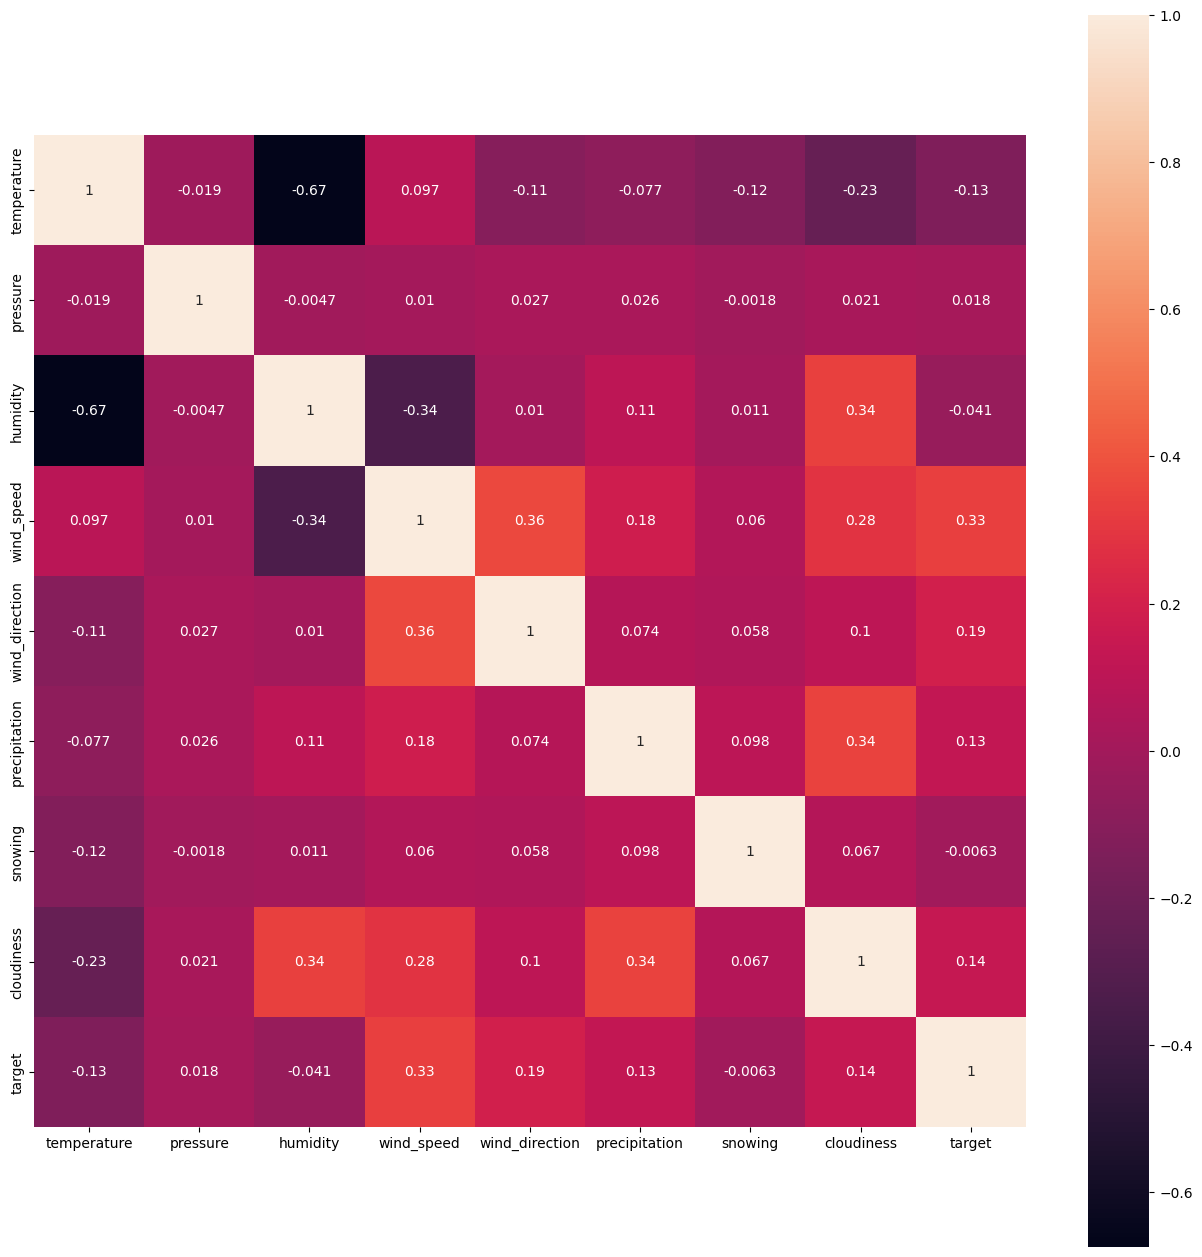

In [12]:
plt.subplots(figsize=(16, 16))
sns.heatmap(tr1.corr(), annot=True, square=True)
plt.show()

#전처리

In [13]:
def mean_speed(x):
    x = round(x,2)
    a = x//1
    a,b = a+0.25,a+0.75
    if x < a:
        x = a - 0.25
    else:
        x = b -0.25
    return x

In [14]:
tr1['meanSpeed'] = tr1['wind_speed'].apply(mean_speed)
tr1.head(100)

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target,meanSpeed
0,27.8816,1013.6,46.8,2.4,232.4,0.00,0,0.0,1.180,2.5
1,5.7540,1026.6,76.6,3.6,172.0,0.00,0,8.8,8.581,3.5
2,20.8220,1016.2,64.8,2.2,206.0,0.06,0,23.0,3.978,2.0
3,20.0758,1017.4,72.6,0.8,215.4,0.00,0,0.0,8.301,0.5
4,7.5260,1023.2,82.8,1.2,158.0,0.00,0,15.0,1.692,1.0
...,...,...,...,...,...,...,...,...,...,...
95,31.3680,1017.4,48.2,2.6,220.0,0.00,0,8.0,13.062,2.5
96,8.4040,1024.6,53.2,3.4,272.0,0.00,0,15.0,11.504,3.5
97,14.5330,996.6,85.6,1.6,164.4,0.06,0,17.6,2.064,1.5
98,23.1800,1016.4,40.2,4.0,186.0,0.06,0,39.0,6.701,4.0


In [15]:
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [16]:
tr1["meanDirection"]=tr1["wind_direction"].apply(mean_direction)
tr1.head(100)

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target,meanSpeed,meanDirection
0,27.8816,1013.6,46.8,2.4,232.4,0.00,0,0.0,1.180,2.5,240
1,5.7540,1026.6,76.6,3.6,172.0,0.00,0,8.8,8.581,3.5,180
2,20.8220,1016.2,64.8,2.2,206.0,0.06,0,23.0,3.978,2.0,210
3,20.0758,1017.4,72.6,0.8,215.4,0.00,0,0.0,8.301,0.5,210
4,7.5260,1023.2,82.8,1.2,158.0,0.00,0,15.0,1.692,1.0,150
...,...,...,...,...,...,...,...,...,...,...,...
95,31.3680,1017.4,48.2,2.6,220.0,0.00,0,8.0,13.062,2.5,210
96,8.4040,1024.6,53.2,3.4,272.0,0.00,0,15.0,11.504,3.5,270
97,14.5330,996.6,85.6,1.6,164.4,0.06,0,17.6,2.064,1.5,150
98,23.1800,1016.4,40.2,4.0,186.0,0.06,0,39.0,6.701,4.0,180


In [17]:
directiondict = {0:"N", 30:"NNE", 60:"NEE", 90:"E", 120:"SEE", 150:"SSE", 180:"S", 210:"SSW", 240:"SWW", 270:"W", 300:"NWW", 330:"NNW"}

def wind_direction(x):
  for x in directiondict:
    return directiondict[x]

In [18]:
tr1['windCDirection'] = tr1['meanDirection'].apply(wind_direction)
tr1.head()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target,meanSpeed,meanDirection,windCDirection
0,27.8816,1013.6,46.8,2.4,232.4,0.00,0,0.0,1.180,2.5,240,N
1,5.7540,1026.6,76.6,3.6,172.0,0.00,0,8.8,8.581,3.5,180,N
2,20.8220,1016.2,64.8,2.2,206.0,0.06,0,23.0,3.978,2.0,210,N
3,20.0758,1017.4,72.6,0.8,215.4,0.00,0,0.0,8.301,0.5,210,N
4,7.5260,1023.2,82.8,1.2,158.0,0.00,0,15.0,1.692,1.0,150,N


In [19]:
list_data=[]
list_yon=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

for i in range(0,12):
    data1T_A=tr1[tr1["windCDirection"] == list_yon[i]]
    
    DepGroup_A = data1T_A.groupby("meanSpeed")
    data_T_A = DepGroup_A.mean()
    
    data_T_A.drop(columns = {"wind_speed",
                             "wind_direction",
                             "meanDirection"},
                  inplace = True)
    
    listTA_WS = data_T_A.index.copy()
    data_T_A["wind_speed"] = listTA_WS
    
    data_T_A = data_T_A[["wind_speed",
                         "temperature",
                         "pressure",
                         "humidity",
                         "precipitation",
                         "snowing",
                         "cloudiness",
                         "target"]]
    
    data_T_A["Index"] = list(range(1,len(data_T_A.index)+1))

    data_T_A.set_index("Index", inplace = True)
    
    #data_T_A = data_T_A.round({'ActivePower(kW)': 2,
                             #'TheoreticalPowerCurve(KWh)': 2})
    
    data_T_A["count"] = [len(data1T_A["meanSpeed"][data1T_A["meanSpeed"] == x]) for x in data_T_A["wind_speed"]]
    list_data.append(data_T_A)

C:\Users\wjy39\AppData\Local\Temp\ipykernel_14932\960192378.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_T_A = DepGroup_A.mean()
C:\Users\wjy39\AppData\Local\Temp\ipykernel_14932\960192378.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_T_A = DepGroup_A.mean()
C:\Users\wjy39\AppData\Local\Temp\ipykernel_14932\960192378.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_T_A = DepGroup_A.mean(

In [20]:
data_T_N = list_data[0]
data_T_NNE = list_data[1]
data_T_NEE = list_data[2]
data_T_E = list_data[3]
data_T_SEE = list_data[4]
data_T_SSE = list_data[5]
data_T_S = list_data[6]
data_T_SSW = list_data[7]
data_T_SWW = list_data[8]
data_T_W = list_data[9]
data_T_NWW = list_data[10]
data_T_NNW = list_data[11]

list_table=[data_T_N,data_T_NNE,data_T_NEE,data_T_E,data_T_SEE,data_T_SSE,data_T_S,
            data_T_SSW,data_T_SWW,data_T_W,data_T_NWW,data_T_NNW]

list_tableName=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

In [21]:
list_table

[       wind_speed  temperature     pressure   humidity  precipitation  \
 Index                                                                   
 1             0.0    19.848200  1018.660000  73.630000       0.009000   
 2             0.5    16.227846  1018.498630  76.666807       0.032624   
 3             1.0    16.019288  1030.172262  76.384186       0.039146   
 4             1.5    16.455869  1022.502489  73.603231       0.048144   
 5             2.0    16.917341  1040.347242  70.317405       0.069114   
 6             2.5    17.246147  1089.997523  66.950803       0.088635   
 7             3.0    18.976244  1029.785735  62.236827       0.093886   
 8             3.5    19.536720  1166.913043  60.564747       0.107274   
 9             4.0    19.619837  1040.361153  60.299248       0.116754   
 10            4.5    19.010141  1260.111139  62.348020       0.131287   
 11            5.0    18.047613  1011.648171  60.717683       0.140305   
 12            5.5    16.766708  1039.

In [22]:
def graph_T(i):
    fig = plt.figure(figsize=(20,10))  
    plt.plot(list_table[i]["wind_speed"],
             list_table[i]["target"],
             label = "Wind speed Curve",
             marker = "o", markersize = 10, linewidth = 5)
    
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Target")
    plt.title("Direction towards {}".format(list_tableName[i]))
    plt.legend()
    plt.show()

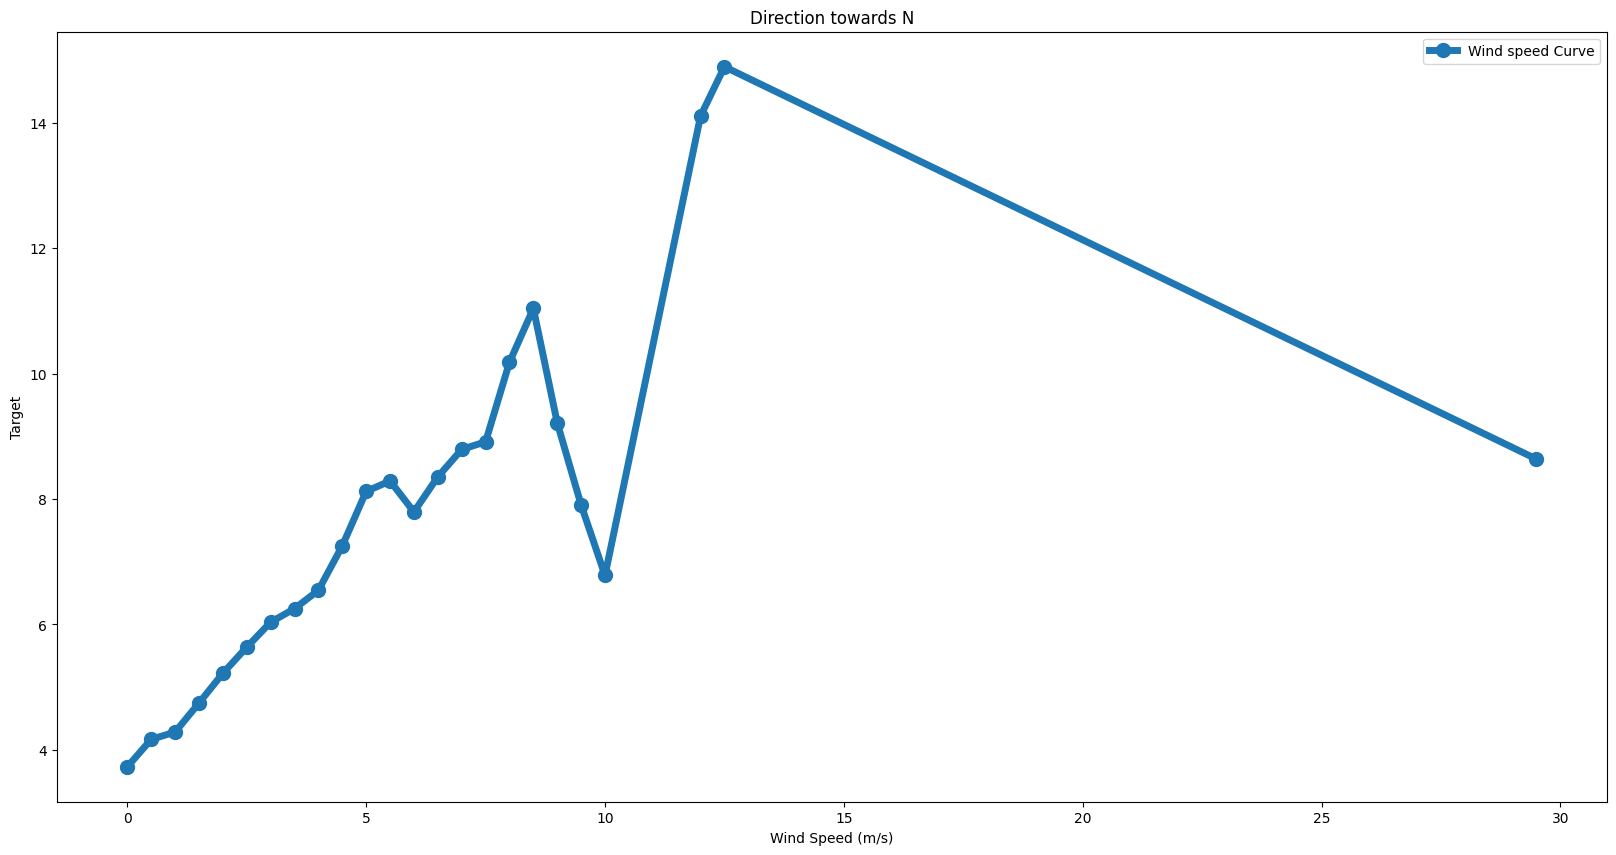

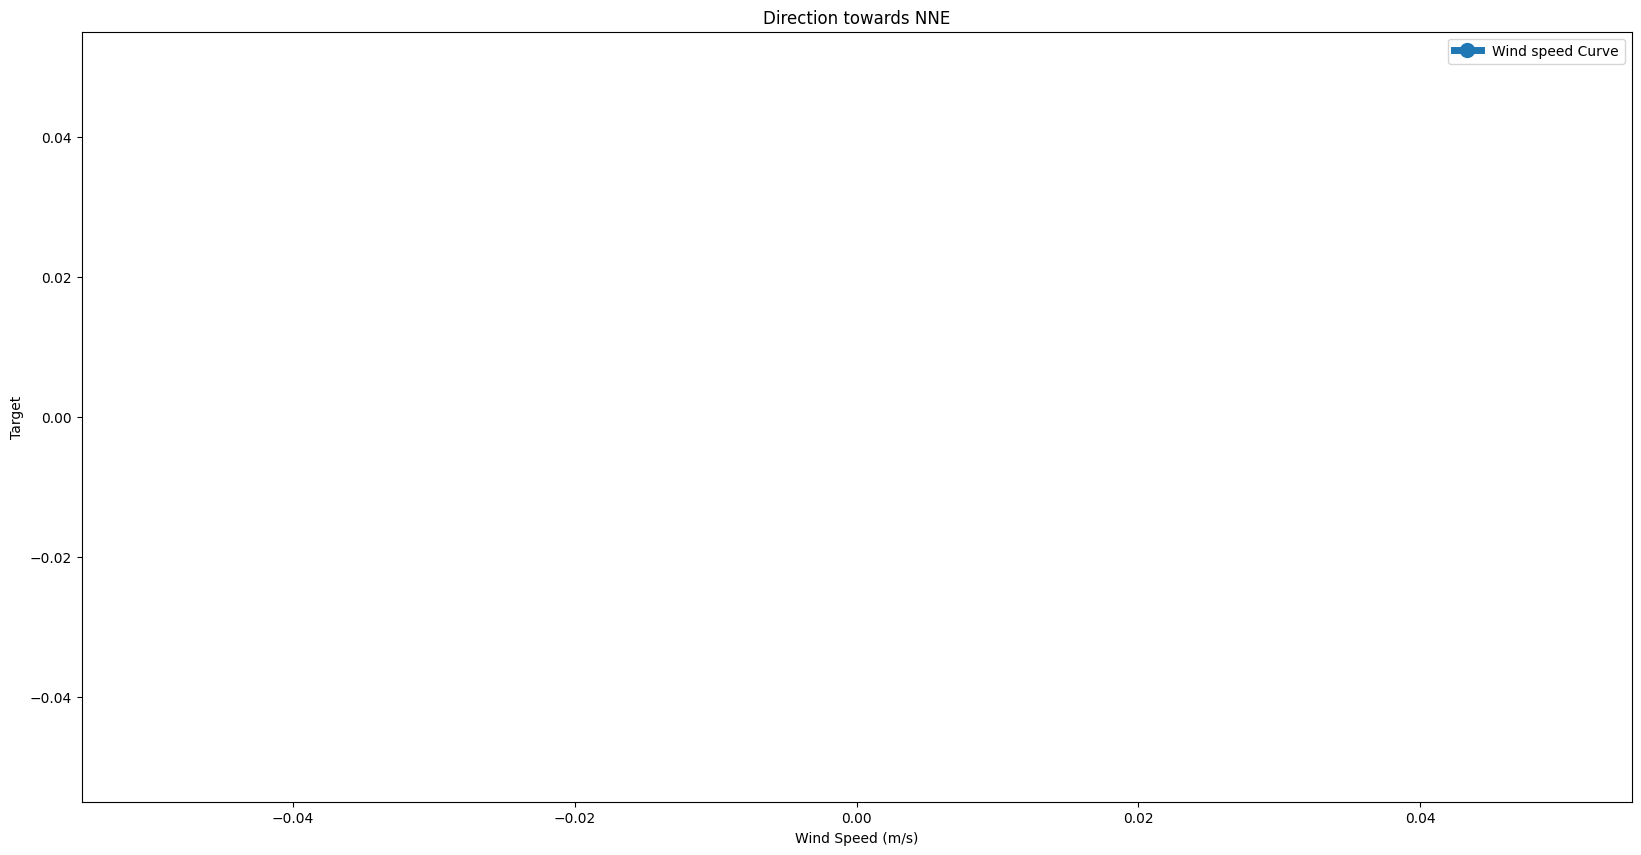

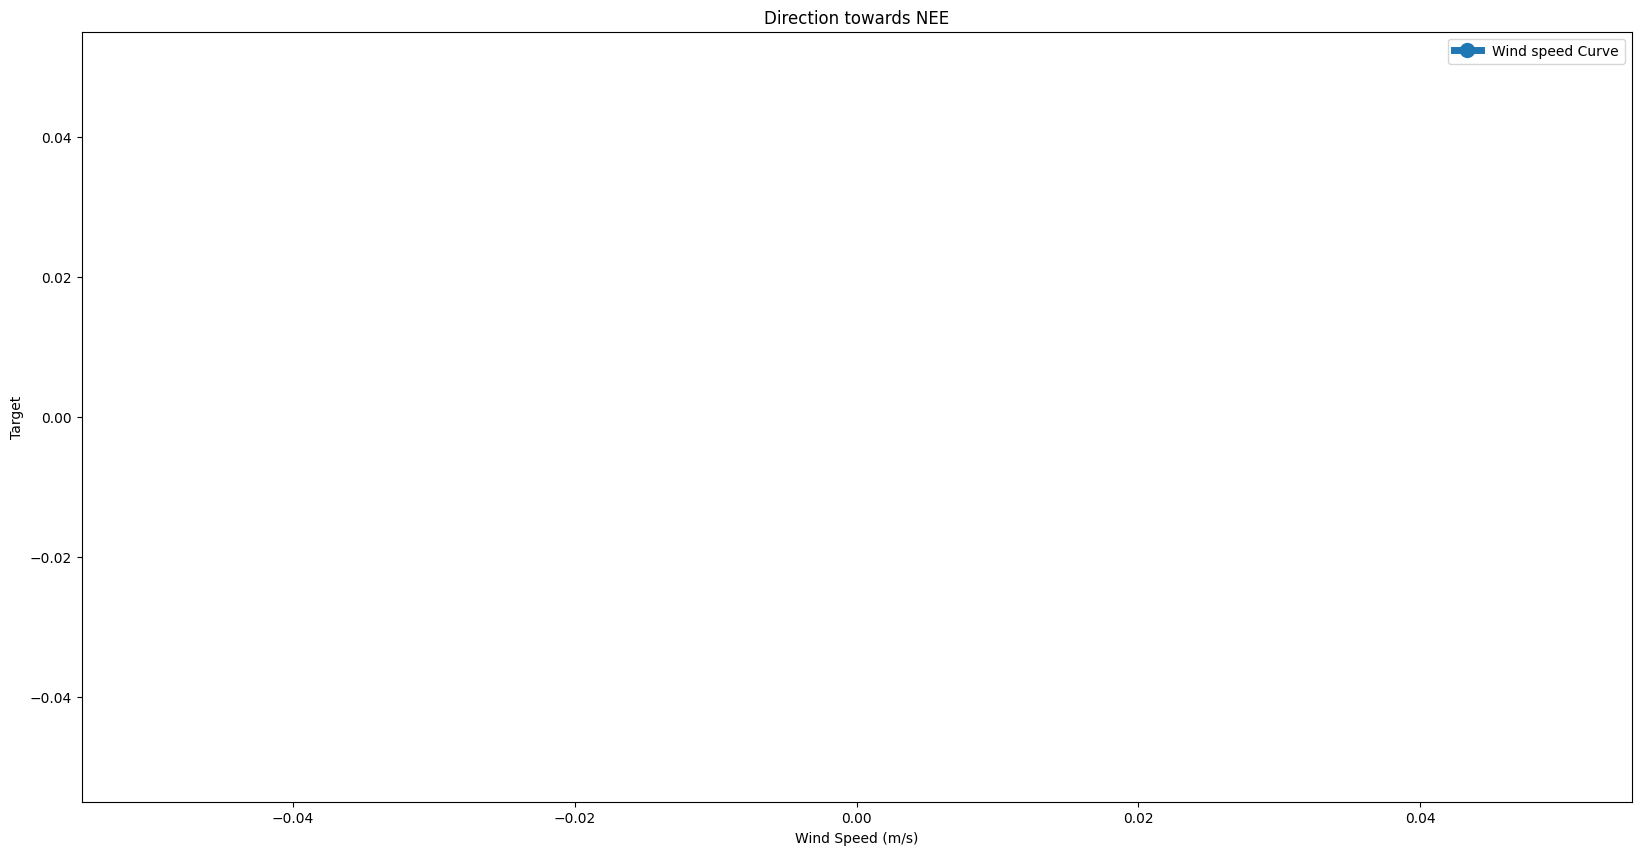

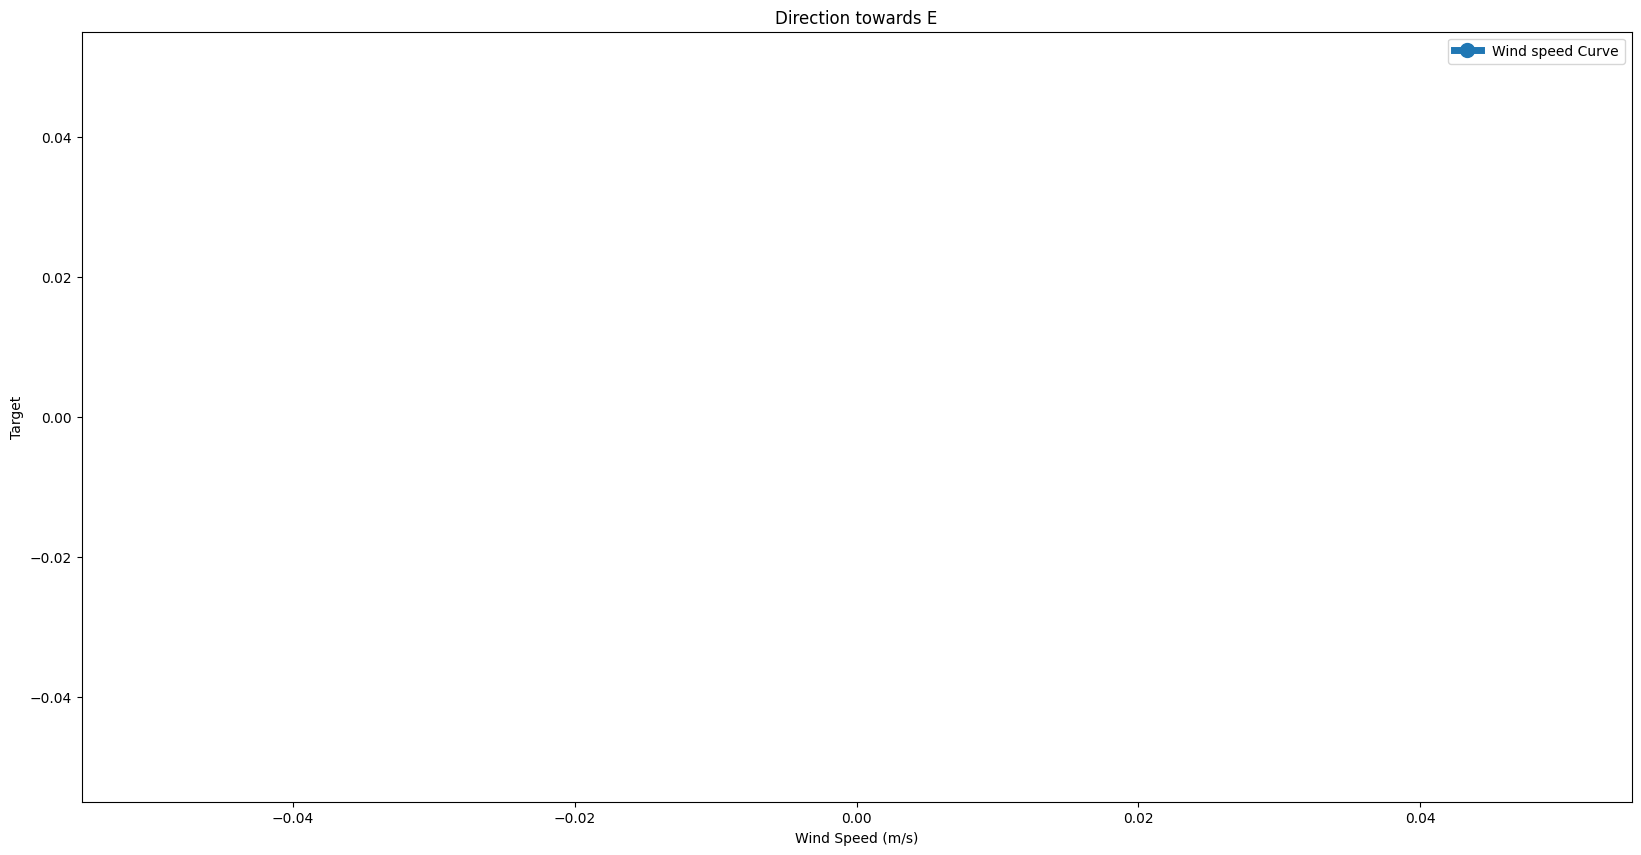

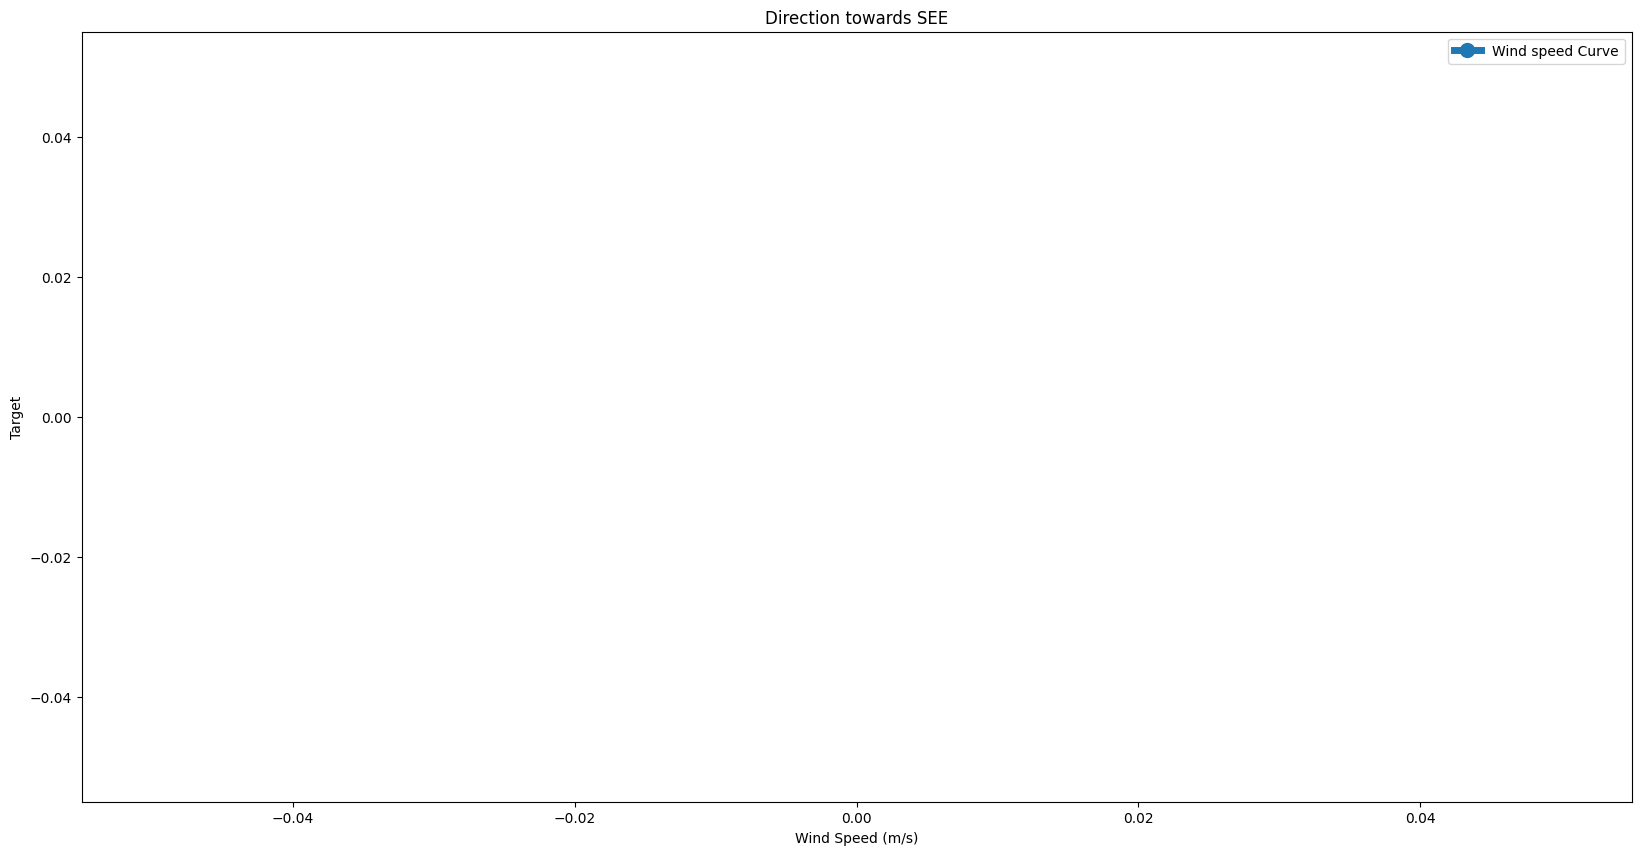

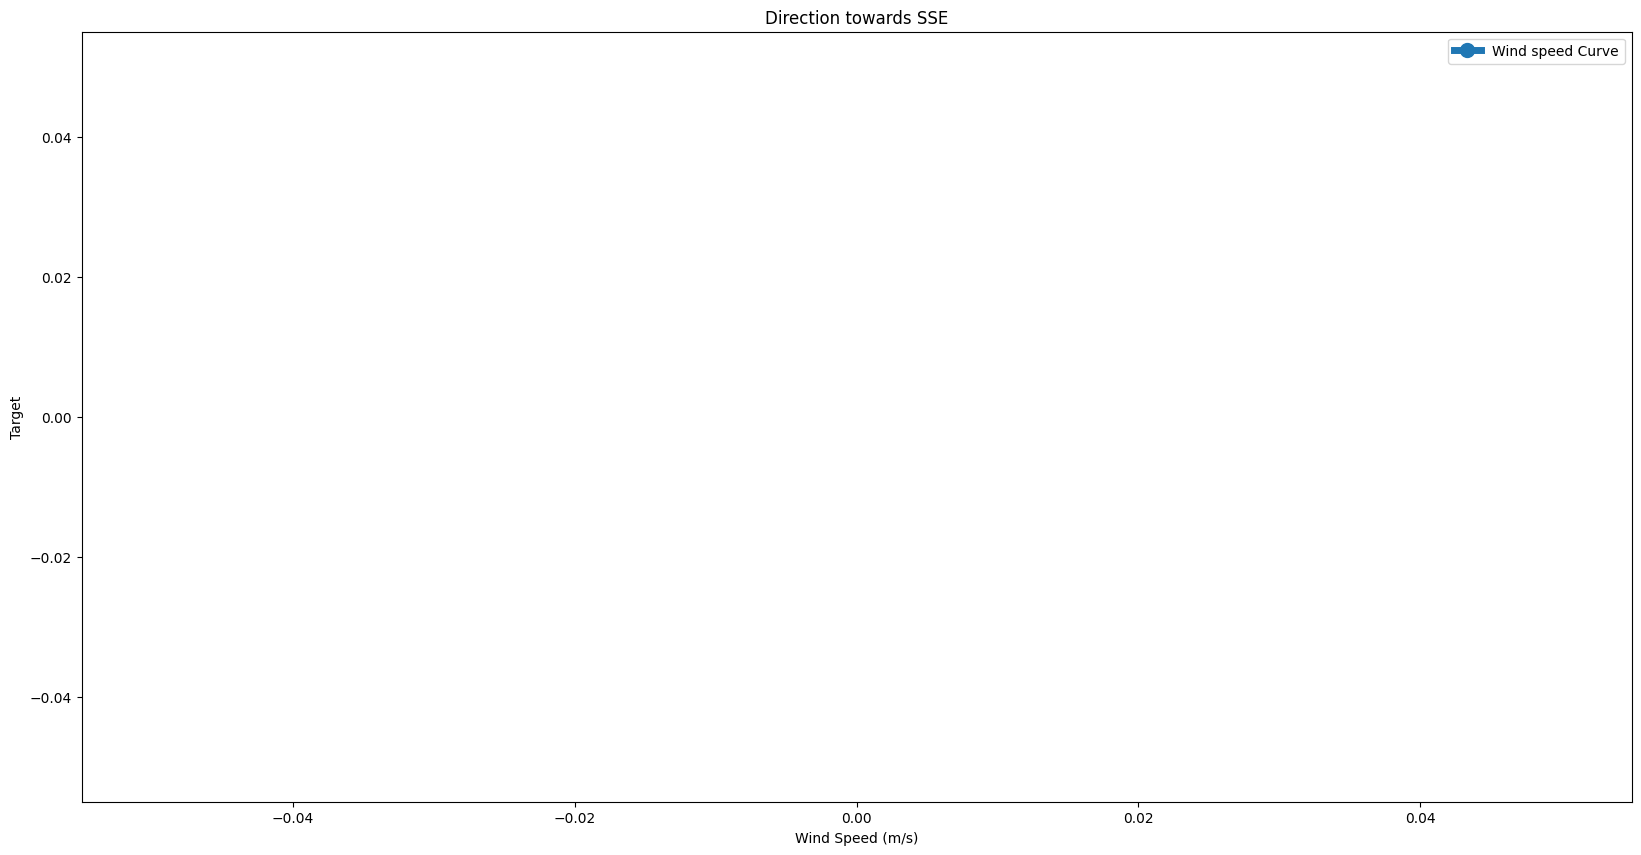

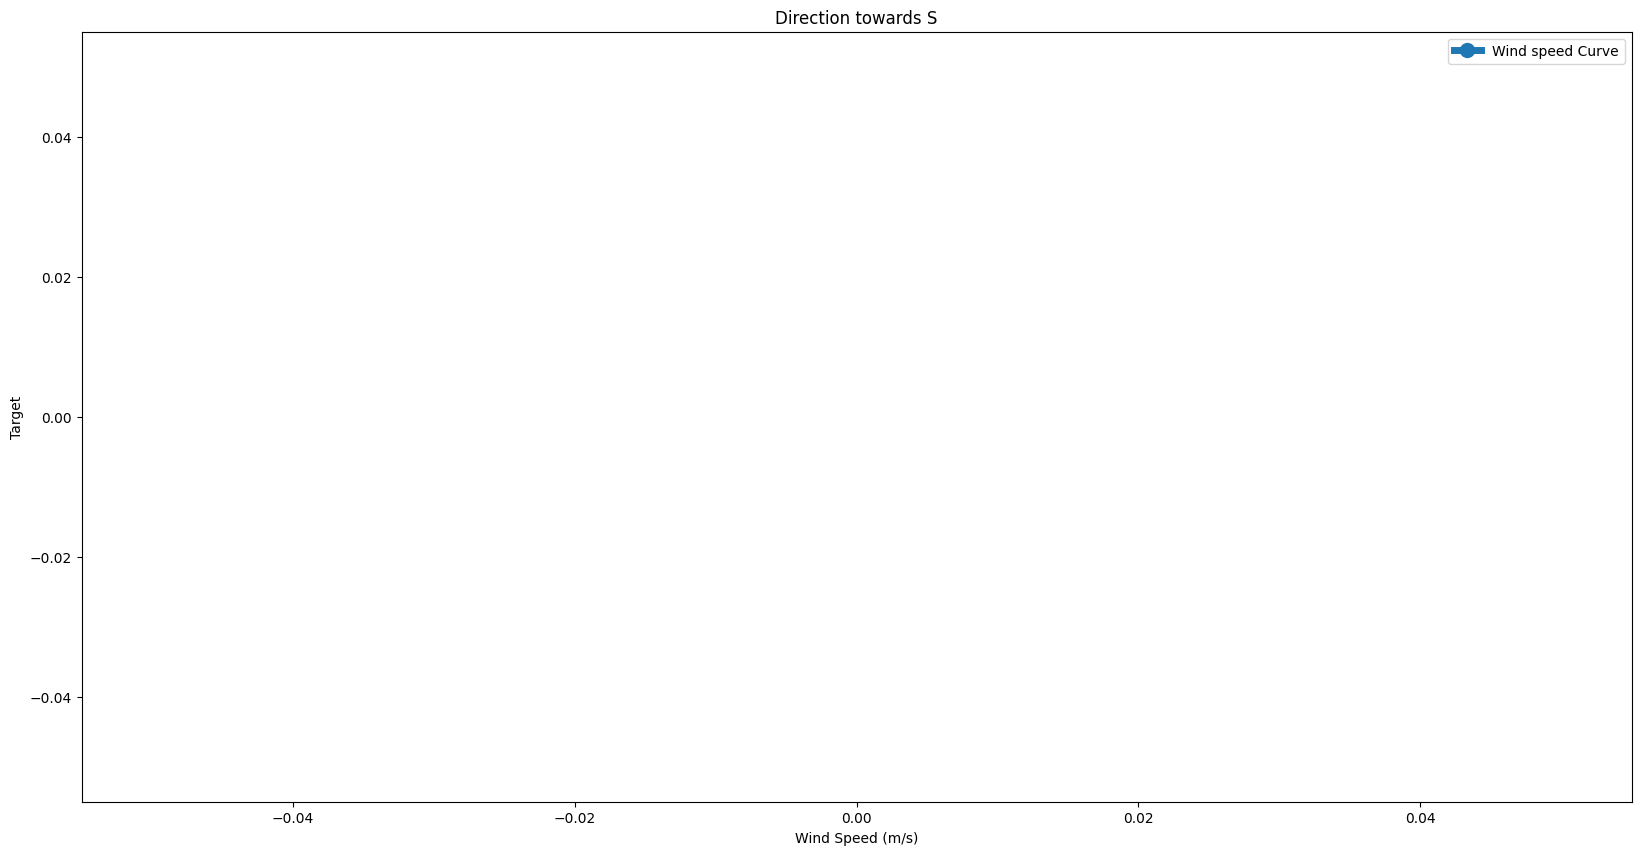

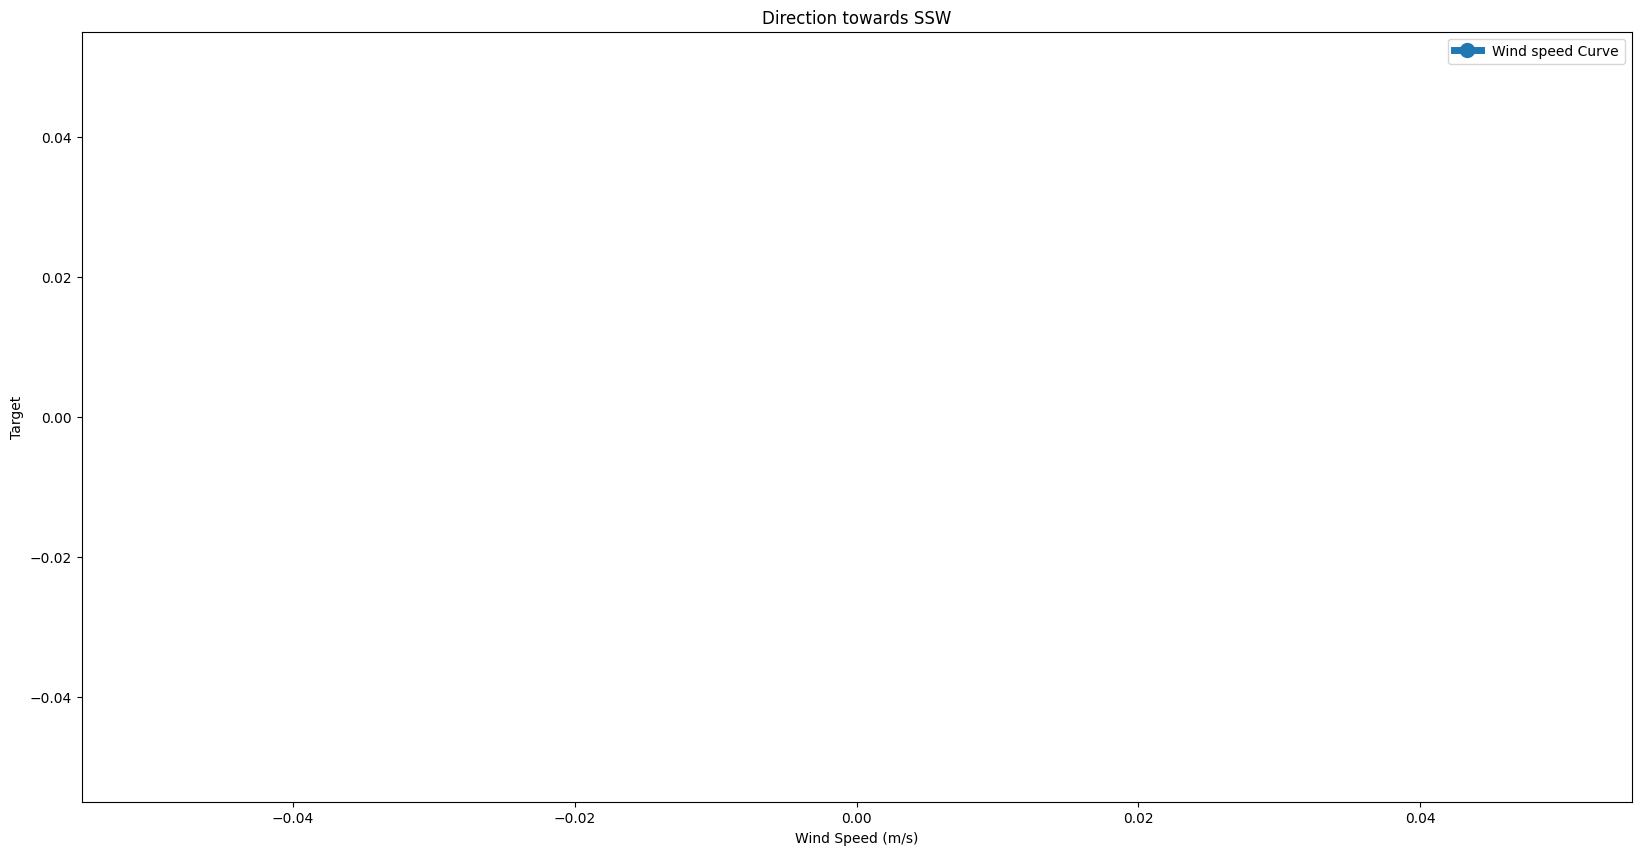

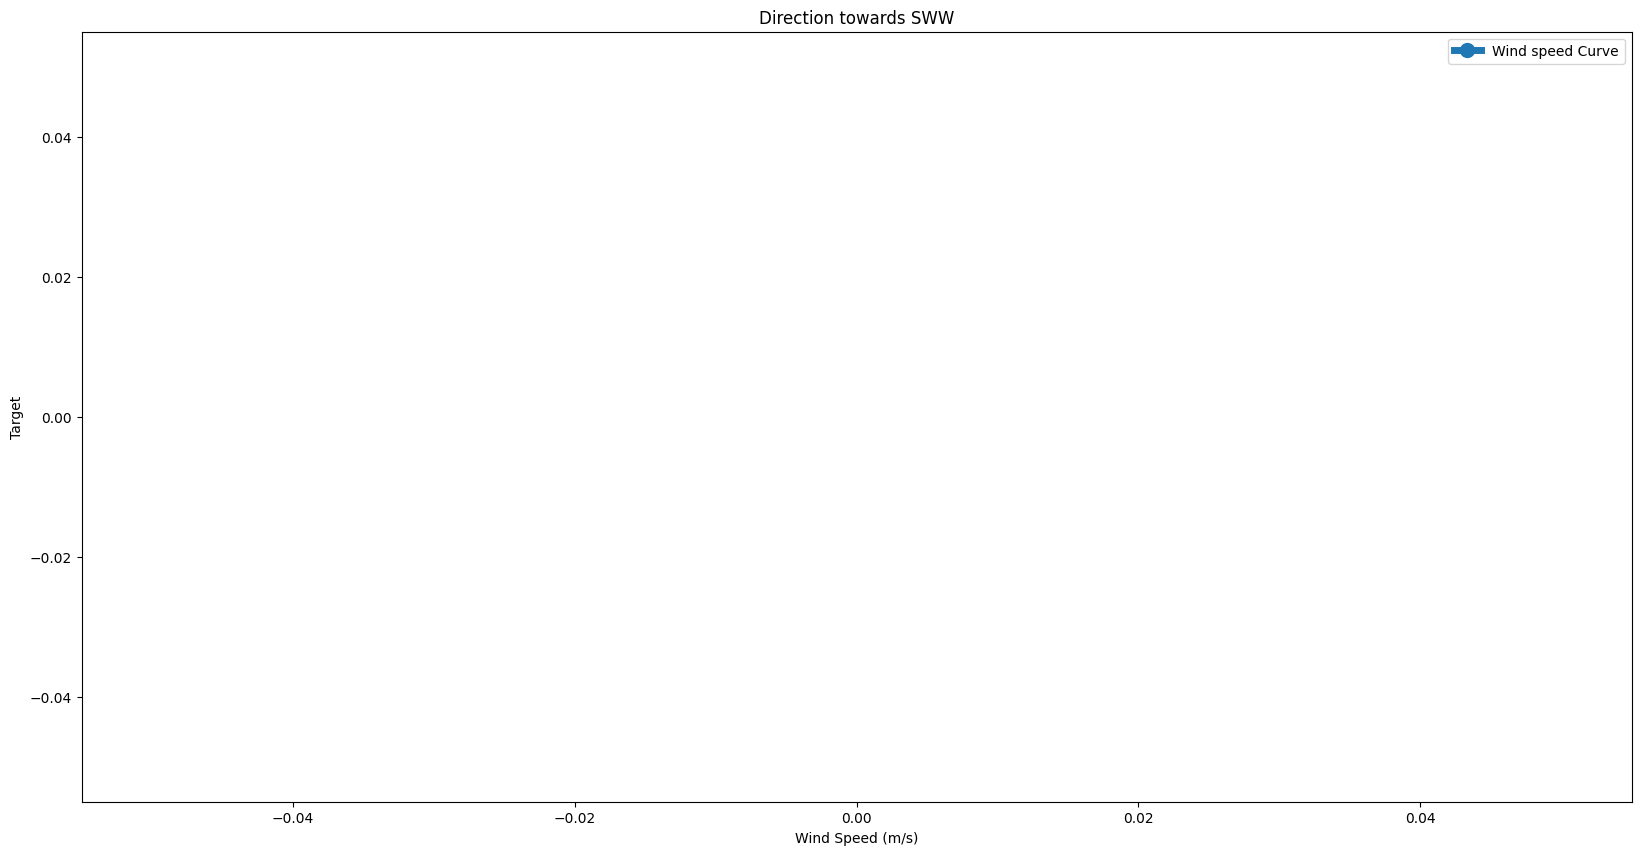

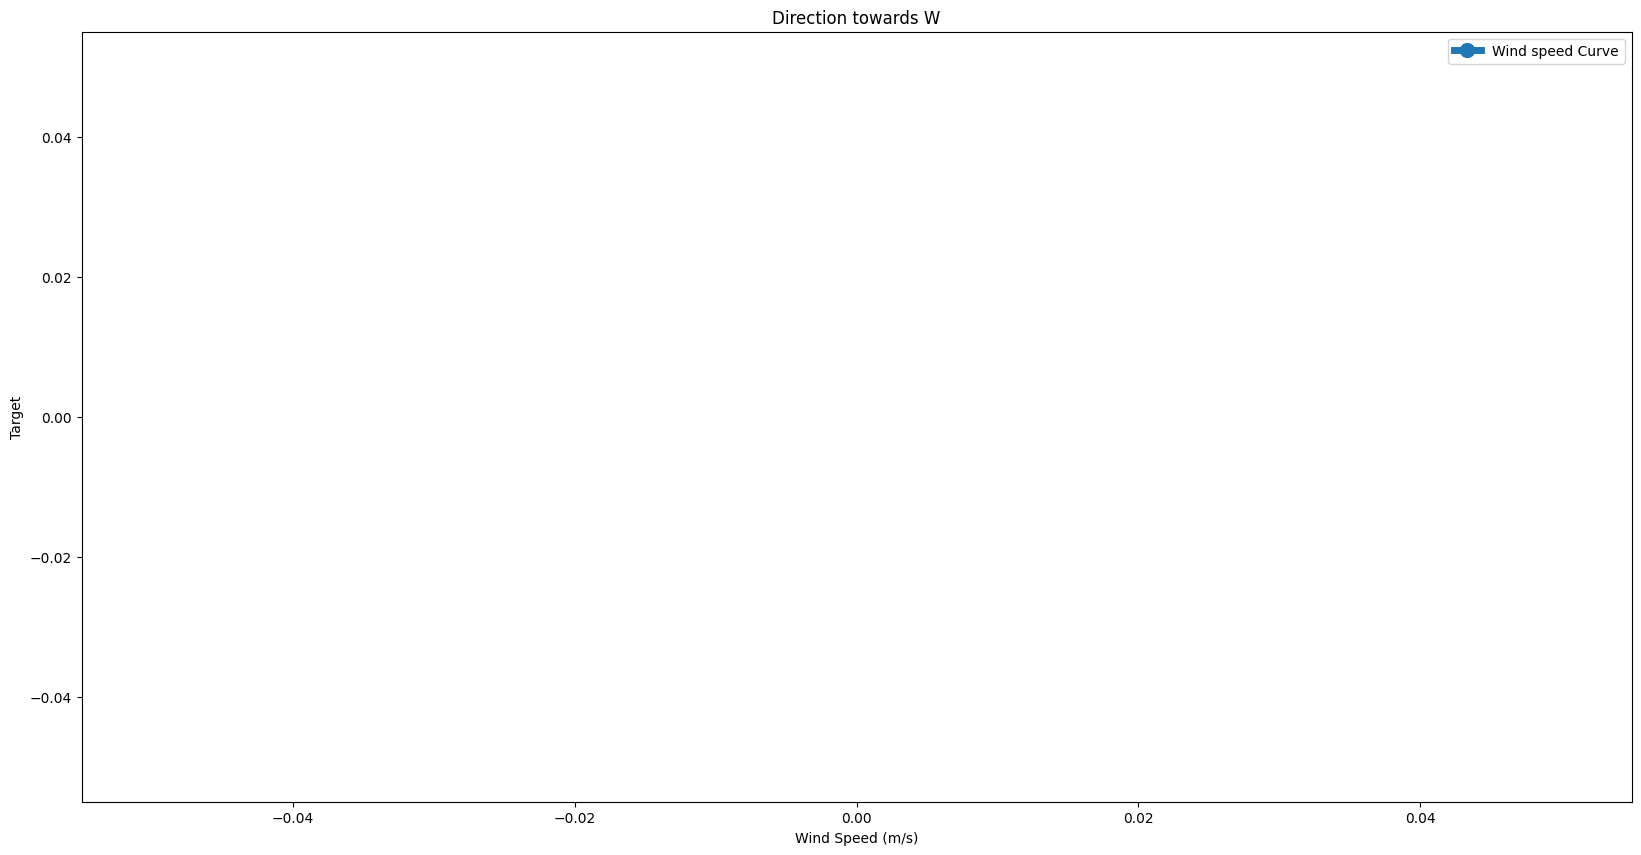

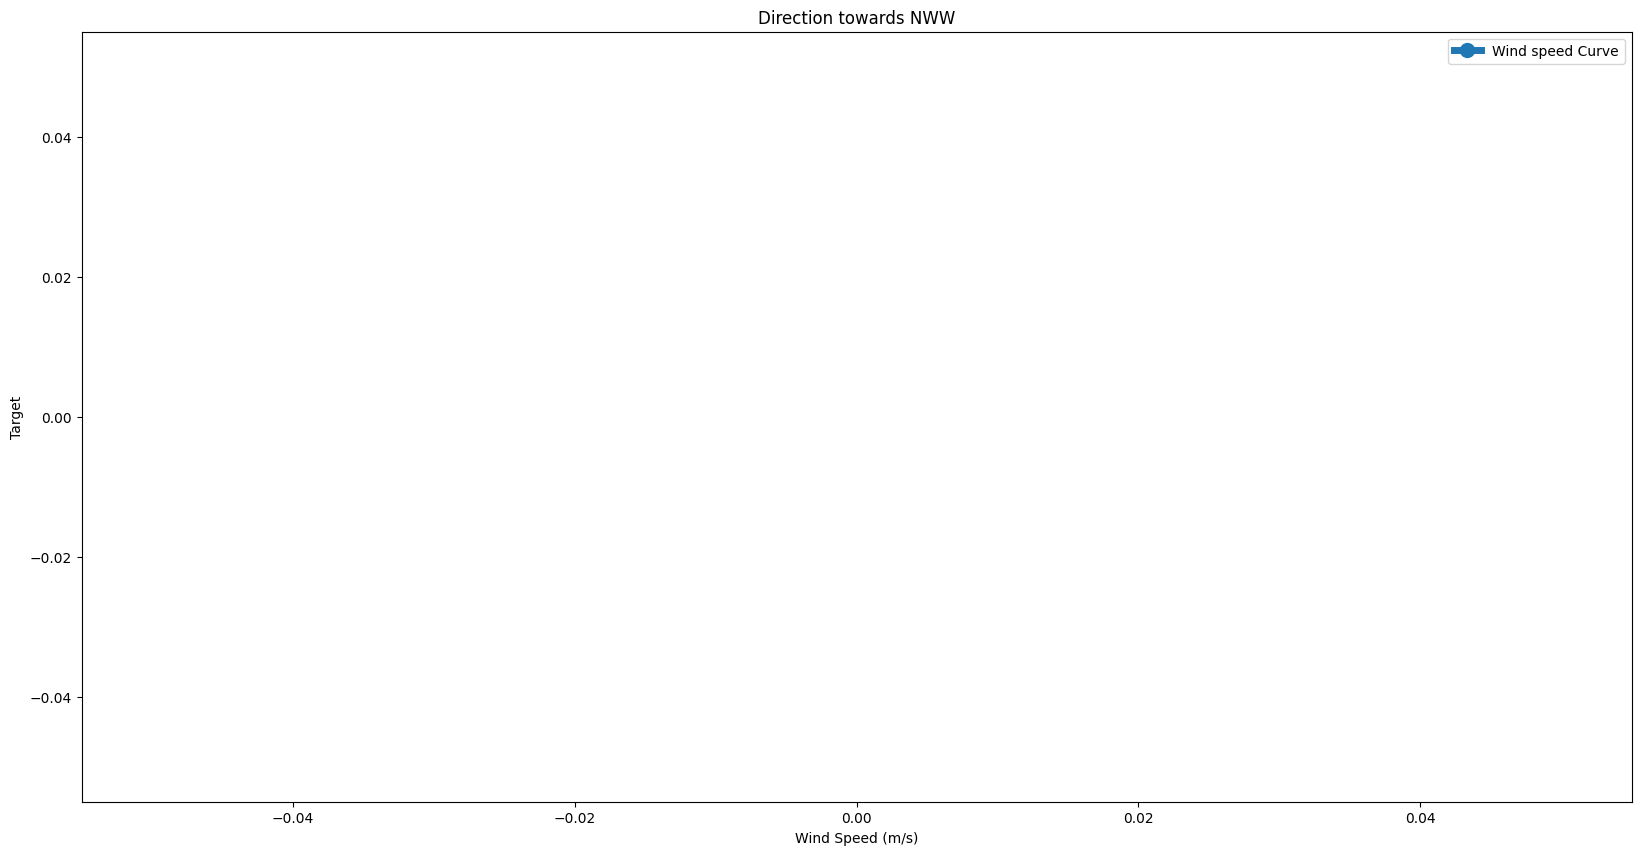

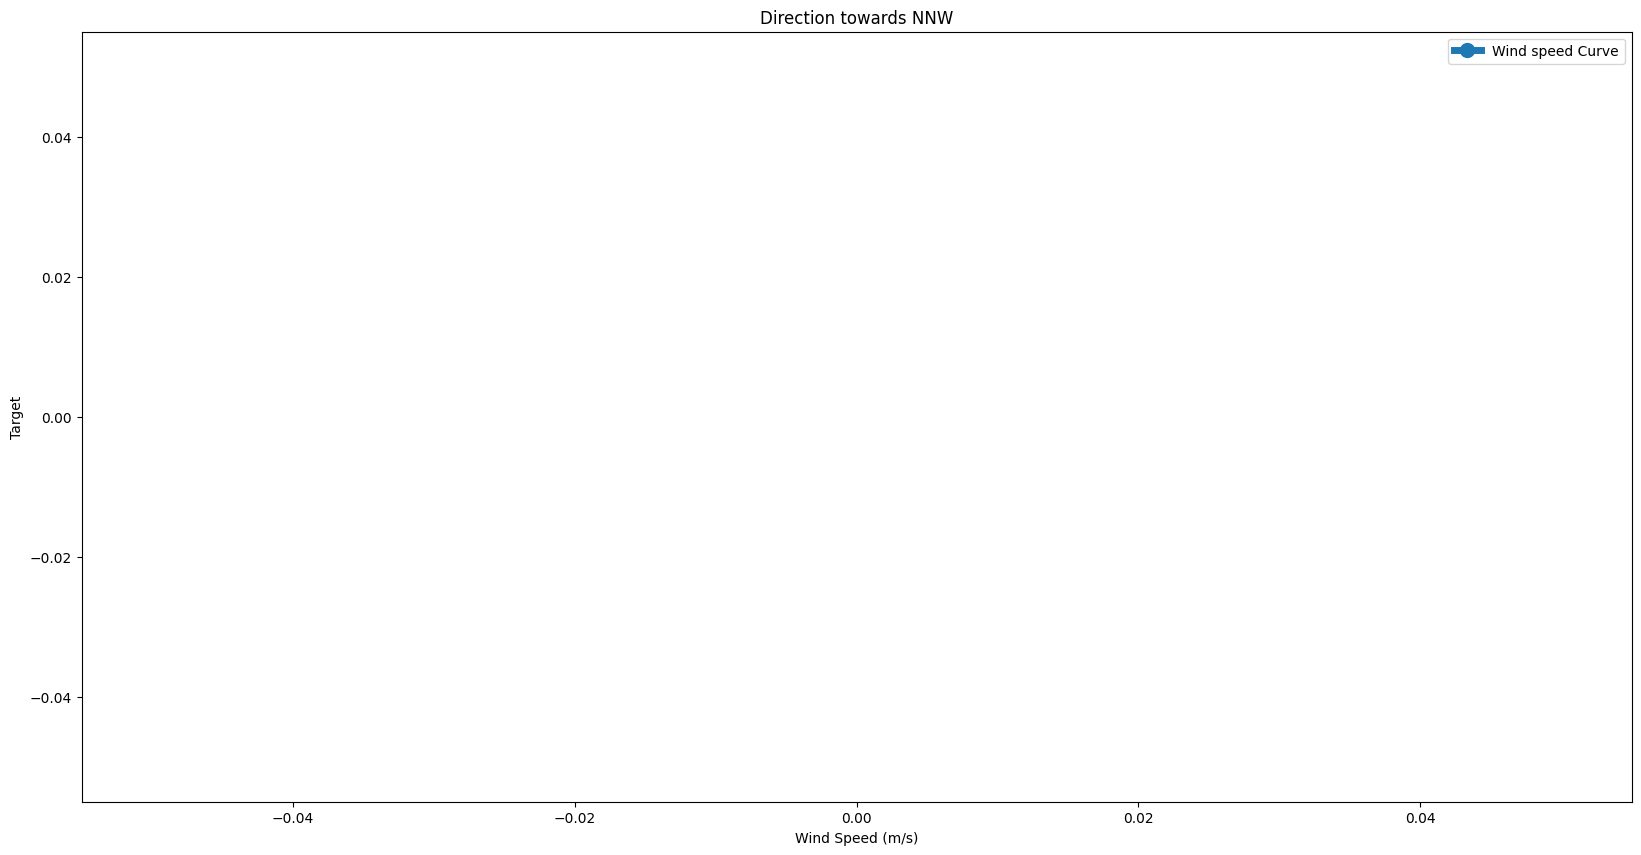

In [23]:
for i in range(0,12):
    graph_T(i)

In [24]:
tr1.head()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target,meanSpeed,meanDirection,windCDirection
0,27.8816,1013.6,46.8,2.4,232.4,0.00,0,0.0,1.180,2.5,240,N
1,5.7540,1026.6,76.6,3.6,172.0,0.00,0,8.8,8.581,3.5,180,N
2,20.8220,1016.2,64.8,2.2,206.0,0.06,0,23.0,3.978,2.0,210,N
3,20.0758,1017.4,72.6,0.8,215.4,0.00,0,0.0,8.301,0.5,210,N
4,7.5260,1023.2,82.8,1.2,158.0,0.00,0,15.0,1.692,1.0,150,N


In [39]:
X = tr1[[ 'wind_direction', 'wind_speed','temperature','humidity']]
X

,wind_direction,wind_speed,temperature,humidity
0,232.4,2.4,27.881600,46.8
1,172.0,3.6,5.754000,76.6
2,206.0,2.2,20.822000,64.8
3,215.4,0.8,20.075800,72.6
4,158.0,1.2,7.526000,82.8
...,...,...,...,...
19270,176.0,1.6,12.020000,81.4
19271,198.0,2.0,17.232000,78.2
19272,260.0,6.4,13.748000,65.0
19273,120.0,2.4,19.354000,45.4


In [40]:
y = tr1['target']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error , r2_score
#from sklearn.externals import joblib

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [43]:
lasso = Lasso(alpha = 0.01)
model = lasso.fit(X_train, y_train) 
pred_train_lasso= lasso.predict(X_train)

print("Training MAE and R2 score:")
print(np.sqrt(mean_absolute_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= lasso.predict(X_test)
print("Testing MAE and R2 score:")
print(np.sqrt(mean_absolute_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

Training MAE and R2 score:
1.5371864958956731
0.14425730178895346
Testing MAE and R2 score:
1.5572671618802907
0.1372889505907101


## submission

In [44]:
te1 = te[[ 'wind_direction', 'wind_speed','temperature','humidity']]
te1

,wind_direction,wind_speed,temperature,humidity
0,104.8,2.0,20.702000,76.4
1,179.2,2.4,18.673669,59.6
2,78.0,2.6,29.908000,49.6
3,118.0,1.8,24.504000,61.0
4,110.0,1.8,12.590000,70.8
...,...,...,...,...
19270,122.0,1.6,25.180000,64.8
19271,245.6,1.8,16.940000,72.4
19272,219.2,2.2,9.032000,94.4
19273,182.0,0.8,15.774000,79.0


In [45]:
pred_sub_lasso= lasso.predict(te1)


In [46]:
d={'id':te['id'],'target':pred_sub_lasso}
ans=pd.DataFrame(d)
ans.to_csv('sample.csv',index=False)